<a href="https://colab.research.google.com/github/TomoharuKurosu/Tomoaharu_Kurosu_2023/blob/main/%E5%A4%A9%E6%B0%97%2050%E5%B9%B4%E5%BA%A6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd


Mounted at /content/drive


In [2]:
#データの読み込み 後で変更
df = pd.read_csv("/content/drive/MyDrive/annual_max_daily_prcp2.csv")

In [3]:
print(df)

     year  annual_max_daily_prcp
0    1875                   94.0
1    1876                   76.2
2    1877                   79.9
3    1878                  150.9
4    1879                   99.8
..    ...                    ...
144  2019                  209.5
145  2020                  132.0
146  2021                  138.5
147  2022                  112.5
148  2023                  168.5

[149 rows x 2 columns]


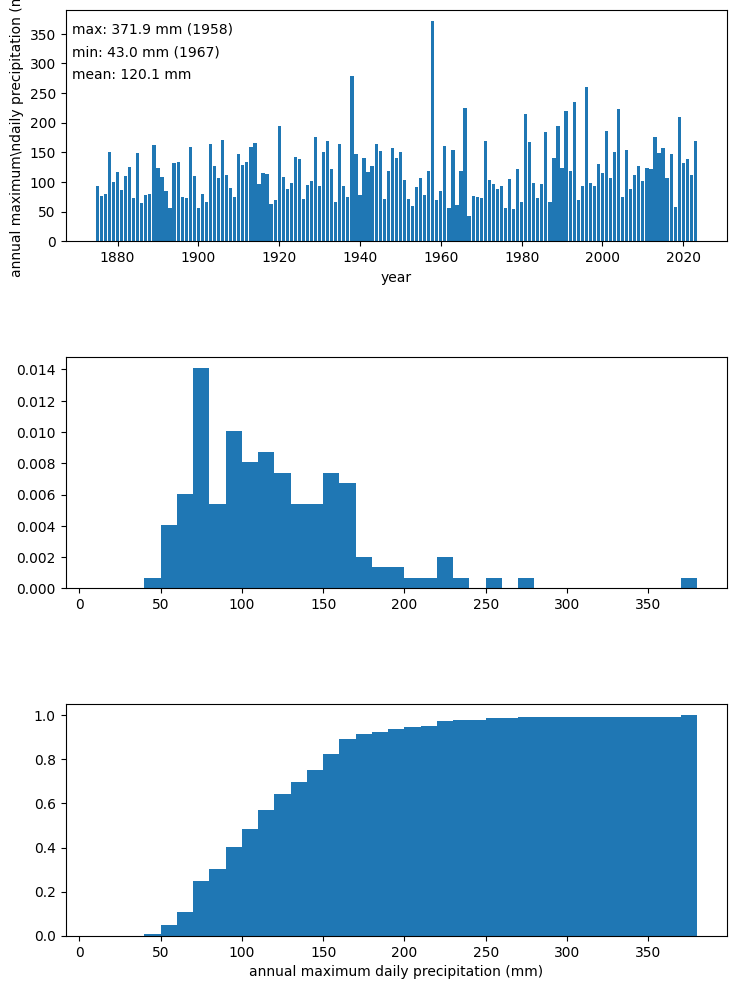

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#------------------------------------------------------------------------------
# データの読み込み
#year = []
#annual_max_daily_prcp = []
#i = 0
#with open('data.csv', 'r') as fin:
#    for line in fin:
#        if i > 1:
#            data = line.split(',')
#            year.append(int(data[0]))
#            annual_max_daily_prcp.append(float(data[1].replace(']', '')))
#        i += 1


year = df["year"].values
annual_max_daily_prcp = df["annual_max_daily_prcp"].values

# ndarrayに変換
year = np.array(year)
annual_max_daily_prcp = np.array(annual_max_daily_prcp)

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.70, 0.80, 0.20])
ax02 = fig.add_axes([0.10, 0.40, 0.80, 0.20])
ax03 = fig.add_axes([0.10, 0.10, 0.80, 0.20])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(year, annual_max_daily_prcp)

ax01.set_xlabel('year')
ax01.set_ylabel('annual maximum\\ndaily precipitation (mm)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {annual_max_daily_prcp.max()} mm ({year[np.argmax(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {annual_max_daily_prcp.min()} mm ({year[np.argmin(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {annual_max_daily_prcp.mean():.1f} mm', transform=ax01.transAxes)

# --- plot 2 と plot 3
# bin のためのリストを作成する
bins = [10*(i+1) for i in range(int(annual_max_daily_prcp.max()/10) + 1)]

# ヒストグラムを表示
ax02.hist(annual_max_daily_prcp, bins=bins, density=True)

# 累積ヒストグラムを表示
ax03.hist(annual_max_daily_prcp, bins=bins, cumulative=True, density=True)
ax03.set_xlabel('annual maximum daily precipitation (mm)')

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

In [5]:
print(year)

[1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888
 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902
 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916
 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930
 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944
 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958
 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972
 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986
 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000
 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019 2020 2021 2022 2023]


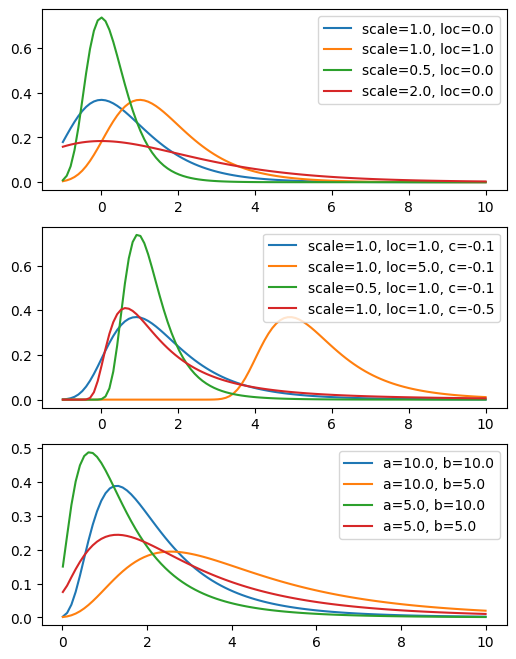

In [6]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss

# --- パラメータの設定
# - Gumbel分布
scale_gumbel = [1.0, 1.0, 0.5, 2.0]
loc_gumbel = [0.0, 1.0, 0.0, 0.0]

# - 一般化極値 (GEV) 分布
scale_gev = [1.0, 1.0, 0.5, 1.0]
loc_gev = [1.0, 5.0, 1.0, 1.0]
c_gev = [-0.1, -0.1, -0.1, -0.5]

# - 平方根指数型最大値分布
a_sqet = [10.0, 10.0, 5.0, 5.0]
b_sqet = [10.0, 5.0, 10.0, 5.0]

# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

# --- 全般の設定
fig = plt.figure(figsize=(6, 8), dpi=100)

ax01 = fig.add_subplot(3, 1, 1)
ax02 = fig.add_subplot(3, 1, 2)
ax03 = fig.add_subplot(3, 1, 3)

x = np.linspace(-1, 10, 110)
for i in range(len(scale_gumbel)):
    rv = ss.gumbel_r.pdf(x, loc=loc_gumbel[i], scale=scale_gumbel[i])
    ax01.plot(x, rv, label=f"scale={scale_gumbel[i]}, loc={loc_gumbel[i]}")

ax01.legend()

for i in range(len(scale_gev)):
    rv = ss.genextreme.pdf(x, c=c_gev[i], loc=loc_gev[i], scale=scale_gev[i])
    ax02.plot(x, rv, label=f"scale={scale_gev[i]}, loc={loc_gev[i]}, c={c_gev[i]}")

ax02.legend()

for i in range(len(a_sqet)):
    rv = sqet(x=x[x>=0], a=a_sqet[i], b=b_sqet[i])
    ax03.plot(x[x>=0], rv, label=f"a={a_sqet[i]}, b={b_sqet[i]}")

ax03.legend()

plt.show()

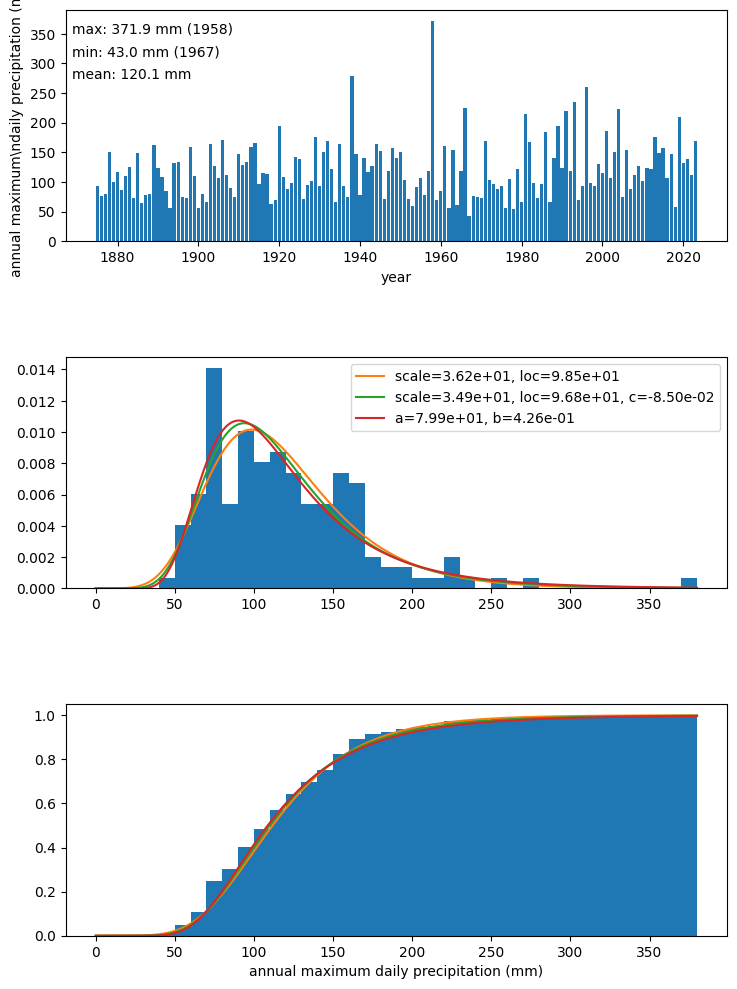

In [7]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
from scipy.optimize import minimize

#-----------------------------------------------------------------------------
# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

def sqet_cdf(x, a, b):
    F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return F

# SQETの対数尤度関数 (にマイナスをつけたもの)
def mL_sqet(b, data):
    n = len(data)

    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))

    L = n*np.log(a) + n*np.log(b) -n*np.log(2) - np.sum(sqbx)
    L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
    return -L

# bからaを求める式
def b2a_sqet(b, data):
    n = len(data)
    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
    return a

#------------------------------------------------------------------------------
# データの読み込み
#year = []
#annual_max_daily_prcp = []
#i = 0
#with open('data.csv', 'r') as fin:
#    for line in fin:
#        if i > 1:
#            data = line.split(',')
#            year.append(int(data[0]))
#            annual_max_daily_prcp.append(float(data[1].replace(']', '')))
#        i += 1

# ndarrayに変換
#year = np.array(year)
#annual_max_daily_prcp = np.array(annual_max_daily_prcp)

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram-and-fitted-pdf.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.70, 0.80, 0.20])
ax02 = fig.add_axes([0.10, 0.40, 0.80, 0.20])
ax03 = fig.add_axes([0.10, 0.10, 0.80, 0.20])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(year, annual_max_daily_prcp)

ax01.set_xlabel('year')
ax01.set_ylabel('annual maximum\\ndaily precipitation (mm)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {annual_max_daily_prcp.max()} mm ({year[np.argmax(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {annual_max_daily_prcp.min()} mm ({year[np.argmin(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {annual_max_daily_prcp.mean():.1f} mm', transform=ax01.transAxes)

# --- plot 2 と plot 3
# Gumbel分布を当てはめる
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(annual_max_daily_prcp, method='MLE')

# 一般化極値分布を当てはめる
c_gev, loc_gev, scale_gev = ss.genextreme.fit(annual_max_daily_prcp, method='MLE')

# 平方根指数型最大値分布を当てはめる
res = minimize(mL_sqet, x0=[1.0], args=annual_max_daily_prcp,
               bounds=[(0, None)], method='Nelder-Mead')
b_sqet = res.x[0]
a_sqet = b2a_sqet(b_sqet, annual_max_daily_prcp)

gbl = ss.gumbel_r(loc=loc_gumbel, scale=scale_gumbel)
gev = ss.genextreme(c=c_gev, loc=loc_gev, scale=scale_gev)

# bin, x のためのリストを作成する
bins = [10*(i+1) for i in range(int(annual_max_daily_prcp.max()/10) + 1)]
x = np.linspace(0.0, 10.0*(int(annual_max_daily_prcp.max()/10) + 1), 20*int(annual_max_daily_prcp.max()/10) + 1)

# ヒストグラムを表示
ax02.hist(annual_max_daily_prcp, bins=bins, density=True)

# 当てはめた分布をプロット
ax02.plot(x, gbl.pdf(x), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
ax02.plot(x, gev.pdf(x), label=f"scale={scale_gev:.2e}, loc={loc_gev:.2e}, c={c_gev:.2e}")
ax02.plot(x, sqet(x, a_sqet, b_sqet), label=f"a={a_sqet:.2e}, b={b_sqet:.2e}")

ax02.legend()

# 累積ヒストグラムを表示
ax03.hist(annual_max_daily_prcp, bins=bins, cumulative=True, density=True)
ax03.plot(x, gbl.cdf(x))
ax03.plot(x, gev.cdf(x))
ax03.plot(x, sqet_cdf(x, a_sqet, b_sqet))

ax03.set_xlabel('annual maximum daily precipitation (mm)')

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

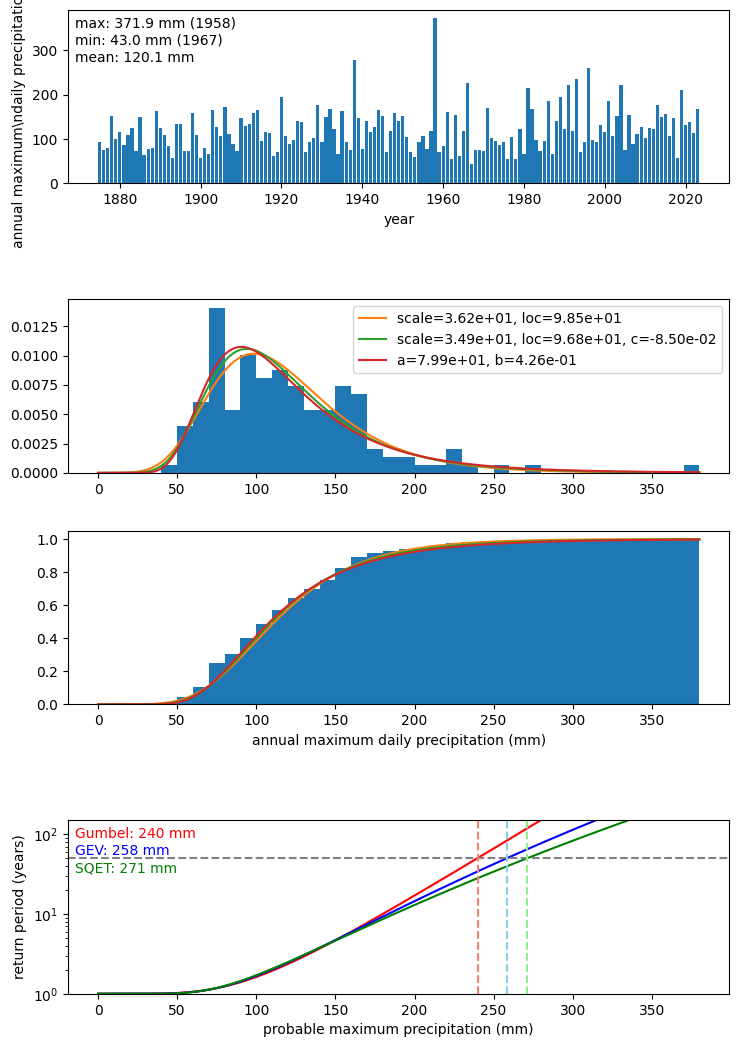

In [8]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
from scipy.optimize import minimize, root_scalar

#-----------------------------------------------------------------------------
# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

def sqet_cdf(x, a, b):
    F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return F

# SQETの対数尤度関数 (にマイナスをつけたもの)
def mL_sqet(b, data):
    n = len(data)

    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))

    L = n*np.log(a) + n*np.log(b) -n*np.log(2) - np.sum(sqbx)
    L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
    return -L

# bからaを求める式
def b2a_sqet(b, data):
    n = len(data)
    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
    return a


#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram-and-fitted-pdf-mod.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.80, 0.80, 0.15])
ax02 = fig.add_axes([0.10, 0.55, 0.80, 0.15])
ax03 = fig.add_axes([0.10, 0.35, 0.80, 0.15])
ax04 = fig.add_axes([0.10, 0.10, 0.80, 0.15])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(year, annual_max_daily_prcp)

ax01.set_xlabel('year')
ax01.set_ylabel('annual maximum\\ndaily precipitation (mm)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {annual_max_daily_prcp.max()} mm ({year[np.argmax(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {annual_max_daily_prcp.min()} mm ({year[np.argmin(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {annual_max_daily_prcp.mean():.1f} mm', transform=ax01.transAxes)

# --- plot 2 と plot 3
# Gumbel分布を当てはめる
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(annual_max_daily_prcp, method='MLE')

# 一般化極値分布を当てはめる
c_gev, loc_gev, scale_gev = ss.genextreme.fit(annual_max_daily_prcp, method='MLE')

# 平方根指数型最大値分布を当てはめる
res = minimize(mL_sqet, x0=[1.0], args=annual_max_daily_prcp,
               bounds=[(0, None)], method='Nelder-Mead')
b_sqet = res.x[0]
a_sqet = b2a_sqet(b_sqet, annual_max_daily_prcp)

gbl = ss.gumbel_r(loc=loc_gumbel, scale=scale_gumbel)
gev = ss.genextreme(c=c_gev, loc=loc_gev, scale=scale_gev)

# bin, x のためのリストを作成する
bins = [10*(i+1) for i in range(int(annual_max_daily_prcp.max()/10) + 1)]
x = np.linspace(0.0, 10.0*(int(annual_max_daily_prcp.max()/10) + 1), 20*int(annual_max_daily_prcp.max()/10) + 1)

# ヒストグラムを表示
ax02.hist(annual_max_daily_prcp, bins=bins, density=True)

# 当てはめた分布をプロット
ax02.plot(x, gbl.pdf(x), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
ax02.plot(x, gev.pdf(x), label=f"scale={scale_gev:.2e}, loc={loc_gev:.2e}, c={c_gev:.2e}")
ax02.plot(x, sqet(x, a_sqet, b_sqet), label=f"a={a_sqet:.2e}, b={b_sqet:.2e}")

ax02.legend()

# 累積ヒストグラムを表示
ax03.hist(annual_max_daily_prcp, bins=bins, cumulative=True, density=True)
ax03.plot(x, gbl.cdf(x))
ax03.plot(x, gev.cdf(x))
ax03.plot(x, sqet_cdf(x, a_sqet, b_sqet))

ax03.set_xlabel('annual maximum daily precipitation (mm)')

# --- plot 4
# 再現期間と確率降水量のプロット
ax04.plot(x, 1.0/(1.0-gbl.cdf(x)), color='red')
ax04.plot(x, 1.0/(1.0-gev.cdf(x)), color='blue')
ax04.plot(x, 1.0/(1.0-sqet_cdf(x, a_sqet, b_sqet)), color='green')

ax04.set_yscale('log')
ax04.set_ylim(1, 150)
ax04.set_xlabel('probable maximum precipitation (mm)')
ax04.set_ylabel('return period (years)')

# 確率降水量の値を求める式
# Gumbel分布
def pp_gumbel(scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc - scale*np.log(-np.log(p))

    return x

# 一般化極値分布
def pp_gev(c, scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc + scale/c*(1.0-(-np.log(p))**c)

    return x

# 平方根指数型最大値分布
def pp_sqet(a, b, T):
    p = 1.0 - 1.0/T

    def f(t):
        return np.log(1.0 + t) - t - np.log(-1.0/a*np.log(p))

    sol = root_scalar(f=f, method='newton', x0=100.0)
    x = sol.root**2/b

    return x

# 再現期間50年の確率降水量を算出し、線を引く
ax04.axhline(50.0, color='gray', linestyle='dashed')
ax04.axvline([pp_gumbel(scale_gumbel, loc_gumbel, 50.0)], color='salmon', linestyle='dashed')
ax04.axvline([pp_gev(c_gev, scale_gev, loc_gev, 50.0)], color='skyblue', linestyle='dashed')
ax04.axvline([pp_sqet(a_sqet, b_sqet, 50.0)], color='lightgreen', linestyle='dashed')

# グラフ上に再現期間50年の確率降水量の値を書く
fig.text(0.01, 0.9, f'Gumbel: {pp_gumbel(scale_gumbel, loc_gumbel, 50.0):.0f} mm', color='red', transform=ax04.transAxes)
fig.text(0.01, 0.8, f'GEV: {pp_gev(c_gev, scale_gev, loc_gev, 50.0):.0f} mm', color='blue', transform=ax04.transAxes)
fig.text(0.01, 0.7, f'SQET: {pp_sqet(a_sqet, b_sqet, 50.0):.0f} mm', color='green', transform=ax04.transAxes)

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)

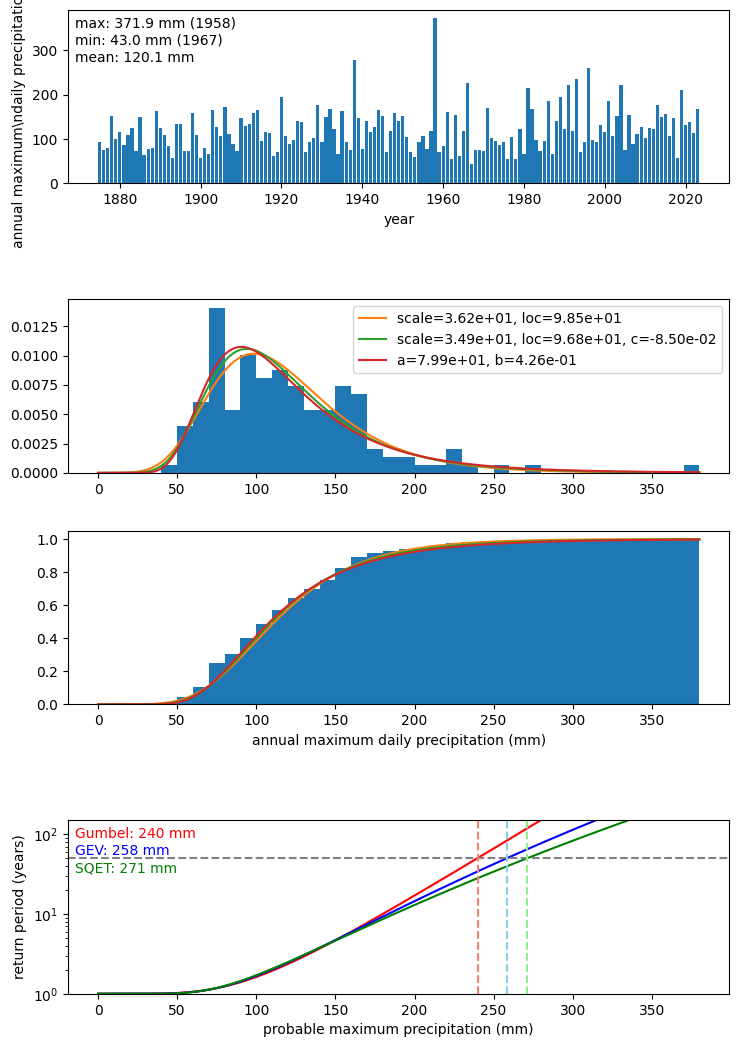

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss
from scipy.optimize import minimize, root_scalar

#-----------------------------------------------------------------------------
# --- 平方根指数型最大値分布の関数
def sqet(x, a, b):
    f = a*b*0.5*np.exp(-np.sqrt(b*x)-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return f

def sqet_cdf(x, a, b):
    F = np.exp(-a*(1.0+np.sqrt(b*x))*np.exp(-np.sqrt(b*x)))
    return F

# SQETの対数尤度関数 (にマイナスをつけたもの)
def mL_sqet(b, data):
    n = len(data)

    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))

    L = n*np.log(a) + n*np.log(b) -n*np.log(2) - np.sum(sqbx)
    L = L - a*(np.sum(np.exp(-sqbx)) + np.sum(sqbx*np.exp(-sqbx)))
    return -L

# bからaを求める式
def b2a_sqet(b, data):
    n = len(data)
    sqbx = np.sqrt(b*data)
    a = (np.sum(sqbx) -2.0*n) / np.sum(b*data*np.exp(-sqbx))
    return a

#------------------------------------------------------------------------------
# --- プロット
# 全般の設定
fig = plt.figure(figsize=(210/25.4, 294/25.4), dpi=100)
out_fig_path = 'histogram-and-fitted-pdf-mod.png'

# プロット枠の設定
ax01 = fig.add_axes([0.10, 0.80, 0.80, 0.15])
ax02 = fig.add_axes([0.10, 0.55, 0.80, 0.15])
ax03 = fig.add_axes([0.10, 0.35, 0.80, 0.15])
ax04 = fig.add_axes([0.10, 0.10, 0.80, 0.15])

# --- plot 1
# 年最大日降水量を西暦毎にバーグラフで表示
ax01.bar(year, annual_max_daily_prcp)

ax01.set_xlabel('year')
ax01.set_ylabel('annual maximum\\ndaily precipitation (mm)')

# グラフ上に最大値、最小値、平均値を表示
fig.text(0.01, 0.9, f'max: {annual_max_daily_prcp.max()} mm ({year[np.argmax(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.8, f'min: {annual_max_daily_prcp.min()} mm ({year[np.argmin(annual_max_daily_prcp)]})', transform=ax01.transAxes)
fig.text(0.01, 0.7, f'mean: {annual_max_daily_prcp.mean():.1f} mm', transform=ax01.transAxes)

# --- plot 2 と plot 3
# Gumbel分布を当てはめる
loc_gumbel, scale_gumbel = ss.gumbel_r.fit(annual_max_daily_prcp, method='MLE')

# 一般化極値分布を当てはめる
c_gev, loc_gev, scale_gev = ss.genextreme.fit(annual_max_daily_prcp, method='MLE')

# 平方根指数型最大値分布を当てはめる
res = minimize(mL_sqet, x0=[1.0], args=annual_max_daily_prcp,
               bounds=[(0, None)], method='Nelder-Mead')
b_sqet = res.x[0]
a_sqet = b2a_sqet(b_sqet, annual_max_daily_prcp)

gbl = ss.gumbel_r(loc=loc_gumbel, scale=scale_gumbel)
gev = ss.genextreme(c=c_gev, loc=loc_gev, scale=scale_gev)

# bin, x のためのリストを作成する
bins = [10*(i+1) for i in range(int(annual_max_daily_prcp.max()/10) + 1)]
x = np.linspace(0.0, 10.0*(int(annual_max_daily_prcp.max()/10) + 1), 20*int(annual_max_daily_prcp.max()/10) + 1)

# ヒストグラムを表示
ax02.hist(annual_max_daily_prcp, bins=bins, density=True)

# 当てはめた分布をプロット
ax02.plot(x, gbl.pdf(x), label=f"scale={scale_gumbel:.2e}, loc={loc_gumbel:.2e}")
ax02.plot(x, gev.pdf(x), label=f"scale={scale_gev:.2e}, loc={loc_gev:.2e}, c={c_gev:.2e}")
ax02.plot(x, sqet(x, a_sqet, b_sqet), label=f"a={a_sqet:.2e}, b={b_sqet:.2e}")

ax02.legend()

# 累積ヒストグラムを表示
ax03.hist(annual_max_daily_prcp, bins=bins, cumulative=True, density=True)
ax03.plot(x, gbl.cdf(x))
ax03.plot(x, gev.cdf(x))
ax03.plot(x, sqet_cdf(x, a_sqet, b_sqet))

ax03.set_xlabel('annual maximum daily precipitation (mm)')

# --- plot 4
# 再現期間と確率降水量のプロット
ax04.plot(x, 1.0/(1.0-gbl.cdf(x)), color='red')
ax04.plot(x, 1.0/(1.0-gev.cdf(x)), color='blue')
ax04.plot(x, 1.0/(1.0-sqet_cdf(x, a_sqet, b_sqet)), color='green')

ax04.set_yscale('log')
ax04.set_ylim(1, 150)
ax04.set_xlabel('probable maximum precipitation (mm)')
ax04.set_ylabel('return period (years)')

# 確率降水量の値を求める式
# Gumbel分布
def pp_gumbel(scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc - scale*np.log(-np.log(p))

    return x

# 一般化極値分布
def pp_gev(c, scale, loc, T):
    p = 1.0 - 1.0/T
    x = loc + scale/c*(1.0-(-np.log(p))**c)

    return x

# 平方根指数型最大値分布
def pp_sqet(a, b, T):
    p = 1.0 - 1.0/T

    def f(t):
        return np.log(1.0 + t) - t - np.log(-1.0/a*np.log(p))

    sol = root_scalar(f=f, method='newton', x0=100.0)
    x = sol.root**2/b

    return x

# 再現期間50年の確率降水量を算出し、線を引く
ax04.axhline(50.0, color='gray', linestyle='dashed')
ax04.axvline([pp_gumbel(scale_gumbel, loc_gumbel, 50.0)], color='salmon', linestyle='dashed')
ax04.axvline([pp_gev(c_gev, scale_gev, loc_gev, 50.0)], color='skyblue', linestyle='dashed')
ax04.axvline([pp_sqet(a_sqet, b_sqet, 50.0)], color='lightgreen', linestyle='dashed')

# グラフ上に再現期間50年の確率降水量の値を書く
fig.text(0.01, 0.9, f'Gumbel: {pp_gumbel(scale_gumbel, loc_gumbel, 50.0):.0f} mm', color='red', transform=ax04.transAxes)
fig.text(0.01, 0.8, f'GEV: {pp_gev(c_gev, scale_gev, loc_gev, 50.0):.0f} mm', color='blue', transform=ax04.transAxes)
fig.text(0.01, 0.7, f'SQET: {pp_sqet(a_sqet, b_sqet, 50.0):.0f} mm', color='green', transform=ax04.transAxes)

#------------------------------------------------------------------------------
# --- 図の保存
plt.savefig(out_fig_path, transparent=False)